<h1 style="font-size:40px;"><center>BREWED AWAKENING - PROJECT REPORT</center></h1>

<div style="display: flex;">
    <img src="https://drive.google.com/uc?export=download&id=1i5vSLa_82YJhvuvlX5CnjjOyhtlh_bOP" alt="Alt text" width="400" height="300" align = left>
    <p style="flex-grow: 1;">We are the Happy Hour Heroes driven by our mission to deliver the secrets to fine brew. 
        <br> <br>Our team members are: <br><br>
    1) Abel Paul Thomas <br>
    2) Divya Jain <br>
    3) Sean Alcid <br>
    4) Shuang Lu <br>
    5) Siddhesh Mishra <br>
    6) Sneha Murali <br>
    7) Tirth Shah <br>
    8) Venkatesh Tripuraneni <br><br>
    </p>
</div>

<img src="https://i.insider.com/5ca275a492c88609d52876d2?width=1000&format=jpeg&auto=webp"  class="center"/>

# __Introduction__:



The worldwide annual beer consumption averages around 28.2 gallons per person and there are 500 diverse beer options to choose from. Our goal, as we embark on a tasty trip, is to understand consumer preferences through in-depth beer review analysis. We're here to provide suggestions for both seasoned and newbie drinkers and brewers. This report is a brief but enjoyable story that adds an element of data-driven insights to the beer discovery experience. Cheers to the journey that lies ahead!


## Questions of Interest:

**1. Impact of Alcohol Content on Beer Ratings?**
- Understanding how alcohol content impacts beer ratings is crucial for breweries refining their offerings. 
- Consumer preferences vary, with some favoring higher alcohol for bold flavors, while others opt for lower content for sessionability. 
- Occasions and events influence these choices. This insight empowers breweries to align their brewing processes with consumer preferences, enhancing market appeal and potentially leading to higher ratings.

**2. Which beer styles consistently resonate with consumers?**
- By pinpointing consistently favored beer styles, breweries can align their offerings with consumer preferences, fostering satisfaction and loyalty. This knowledge also streamlines production, reducing waste and optimizing efficiency.

 
**3. What features significantly contribute to a beer's success as a brand?**
- Analyzing key elements that contribute to the success of a beer assists breweries in differentiating their brand, allowing them to stand out in a competitive market and attract a loyal consumer base.
   
**4. Can we pinpoint factors leading to poor reception of a beer brand?**
   - Investigating the factors that contribute to poor reception might help breweries address quality concerns. This, in turn, promotes constant improvement and the production of superior products.   

## Dataset Description: Beer Reviews from Beer Advocate

**Data Source:**
Kaggle, a popular machine learning and data science platform, was used to gather the dataset. It comprises beer reviews gathered from Beer Advocate, a renowned blog site where visitors rate and comment on various beers.


**Size:**
The collection has 1.5 million findings, each of which covers details across 13 distinctive characteristics.


**Timeframe:**
The reviews range from 1996 to 2012, providing a thorough insight of beer preferences over a long period of time.

**About the Data:**
- **Brewery Information:**
  - `brewery_id`: The unique ID of the brewery producing the beer.
  - `brewery_name`: The name of the brewery.

- **Review Details:**
  - `review_time`: Date and time of the beer review.
  - `review_overall`: Reviewer's overall rating of the beer on a scale of 0 to 5.
  - `review_aroma`: Reviewer's rating of the beer's aroma on a scale of 0 to 5.
  - `review_appearance`: Reviewer's rating of the beer's appearance on a scale of 0 to 5.
  - `review_palate`: Reviewer's rating of the beer's palate on a scale of 0 to 5.
  - `review_taste`: Reviewer's rating of the beer's taste on a scale of 0 to 5.

- **User Information:**
  - `review_profilename`: Reviewer's profile name.

- **Beer Details:**
  - `beer_style`: Style of beer.
  - `beer_name`: The name of the beer.
  - `beer_abv`: Alcohol by volume (ABV) of the beer.
  - `beer_beerid`: Unique beer ID.

**Acquisition Method:**
The data was acquired via Kaggle and is based on user-generated content from Beer Advocate. Beers are rated and reviewed by users based on a variety of factors such as scent, appearance, palate, and flavor.

##  __Choice for Heavier Grading on Data Processing or Data Analysis__ :

- We are choosing to be graded heavily on __DATA ANALYSIS__.
- Our project places a strong emphasis on data analysis, focusing our efforts towards data refinement to enhance the quality of insights generated. 
- We have performed  sufficient data processing  for removing inconsitencies which cannot be utilized for analysis and carefully chosen the attributes from the cleaned the data to keep only the relevant observations.
- The core motivation for prioritizing data analysis lies in our adoption of the k-means clustering machine learning algorithm. 
- Substantial efforts have been dedicated to preparing the data for clustering, involving encoding, scaling, and comprehensive profiling. 
- This strategic approach to data preparation is designed to extract valuable, data-driven insights that will effectively address our business questions. 
- The robustness of our data analysis process is pivotal to the success of our project.

## __Data Processing__   :

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)
from sklearn.preprocessing import MinMaxScaler
from tabulate import tabulate

## Loading The Dataset:

We load the dataset to begin our initial analysis, and once the loading process is over, we carefully review the data.

In [2]:
path=''

beer_reviews = pd.read_csv(path +  "beer_reviews.csv", index_col = 'index')

This stage seeks to pinpoint any discrepancies and define the extent of required cleaning and processing steps.

In [3]:
# Preview of the loaded dataset
beer_reviews

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
index,,,,,,,,,,,,,
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061
1586610,14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061
1586611,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061


## Exploratory Data Analysis:

### Information on columns in the dataset

We aim to understand the data better by examining data types and the count of non-null values in each of the 13 columns.


In [4]:
beer_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 169.5+ MB



The majority of the columns consist of float and int values.

In [5]:
beer_reviews.isnull().sum()

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

Notably, there are null values in the Beer Abbreviation, Brewery Name, and Review Profile Name columns.

### Descriptive Statistics of the dataset

Next, we try to learn about the various statistics for each numerical column. It gives a quick overview of the distribution of numerical data in our DataFrame.

In [6]:
beer_reviews.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


### Checking for null values

In [7]:
# Total number of null values of the alcohol percentage column
beer_alcohol_null_values= beer_reviews['beer_abv'].isnull().sum()

# Total number of rows in the dataset
num_rows=beer_reviews.shape[0]

# Percentage of beer alcholo percentage values that are null
beer_abv_na_perc = (beer_alcohol_null_values / num_rows) * 100
print(f"{beer_abv_na_perc:.1f}% of values in column 'beer_abv' are null.")

4.3% of values in column 'beer_abv' are null.


We see that there are some null values in the columns 'brewery_name', 'review_profilename' and 'beer_abv'.

For the purpose of our analysis, the 'brewery_name' and 'review_profilename' are irrelevant.

We are only concerned with the attributes of the beer. Hence, the missing values in these two columns can simply be marked as 'Unknown'.

In the case of missing values in beer_abv, we can handle this issue by simply dropping these rows from the data set since they account for only 4.3% of the total rows.

### Treating the missing values

#### 1. Replacing missing 'brewery_name' and 'review_profilename' values with 'unknown'

We are intentionally fabricating data  i.e. replacing missing beer names with the word 'unknown' so that we can still use other attributes from those rows to gain insights.

In [8]:
# Using the function fillna to replace null values with 'Unknown'
beer_reviews['brewery_name'].fillna('Unknown', inplace=True)
beer_reviews['review_profilename'].fillna('Unknown', inplace=True)

#### 2. Dropping  null values in the 'beer_abv' column

Since beer_abv is an important characteristic for our analysis and there is no accurate information available over the internet for alcohol by volume for those corresponding beers, we drop rows will null beer_abv

In [9]:
beer_reviews.dropna(inplace = True)
beer_reviews.isnull().sum()

brewery_id            0
brewery_name          0
review_time           0
review_overall        0
review_aroma          0
review_appearance     0
review_profilename    0
beer_style            0
review_palate         0
review_taste          0
beer_name             0
beer_abv              0
beer_beerid           0
dtype: int64

#### 3. Correcting the data type and format of 'review_time' column



The data has the column 'Review Time' having time in unix timestamp format.

We convert it to the standard 'YYYY-MM-DD' format.

In [10]:
# Converting the unix timestamp data to the standard datetime format
beer_reviews['review_time'] = pd.to_datetime(beer_reviews[ 'review_time' ], unit = 's')

In [11]:
beer_reviews.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
index,,,,,,,,,,,,,
0,10325,Vecchio Birraio,2009-02-16 20:57:03,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,2009-03-01 13:44:57,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,2009-03-01 14:10:04,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,2009-02-15 19:12:25,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,2010-12-30 18:53:26,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


#### 4. Handling duplicate reviews

Upon inspecting the dataset, we see that some of the users have reviewed the same beer more than once.

This is potentially due to the fact the opinions and preferences for a person can change over time.

Therefore, to deal with such instances, we can simply take the latest review made by that person which would reflect their most recent take on the beer.

In [12]:
# Obtaining the list of reviews that have the same combination of profile name and beer id more than once
beer_reviews.loc[beer_reviews.duplicated(['review_profilename','beer_beerid'],keep=False)]\
                                        [['review_profilename','beer_name','beer_beerid','review_overall']]

,review_profilename,beer_name,beer_beerid,review_overall
index,,,,
187,barleywinefiend,Caldera Pale Ale,25414,4.0
199,barleywinefiend,Caldera Pale Ale,25414,4.0
389,barleywinefiend,Caldera IPA,10784,4.0
426,barleywinefiend,Caldera IPA,10784,3.5
804,flexabull,Ashland Amber,10785,4.0
...,...,...,...,...
1585815,rayjay,Drake's Drakonic Imperial Stout,12172,4.5
1586013,Georgiabeer,Drake's 1500 Pale Ale,25095,4.0
1586027,Georgiabeer,Drake's 1500 Pale Ale,25095,4.0


 As seen from the above scenario, there are multiple reviews by a single user for the same beer ID or beer name.

 Hence, these duplicates are dropped and only their latest reviews have been kept.

In [13]:
# Sorting chronologically
beer_reviews = beer_reviews.sort_values('review_time',ascending=False)

# Removing the duplicates of the same person reviewing the same beer and from the same brewery
beer_reviews = beer_reviews.drop_duplicates(subset = ['review_profilename','beer_beerid'], keep='first')

In [14]:
beer_reviews.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
index,,,,,,,,,,,,,
551371,22194,Flat Tail Brewing,2012-01-11 12:35:48,4.0,4.0,4.0,Rifugium,American Pale Ale (APA),4.0,4.0,Flat Tail Bourbon Pale,6.0,66257
551392,22194,Flat Tail Brewing,2012-01-11 12:29:30,3.5,3.5,3.0,Rifugium,Kölsch,3.5,3.5,Tailgater,5.5,73600
400524,694,Tröegs Brewing Company,2012-01-11 10:10:56,4.0,4.5,4.0,Lawl3ss,Oatmeal Stout,4.0,4.0,Tröegs Java Head Stout,7.5,52128
1153730,454,Arcadia Brewing Company,2012-01-11 09:44:09,4.0,4.0,4.0,cquinn17,Scotch Ale / Wee Heavy,3.5,3.5,Arcadia Loch Down Scotch Ale,8.0,6384
562035,423,Boulevard Brewing Co.,2012-01-11 09:34:14,4.5,4.0,4.0,libbey,Quadrupel (Quad),4.5,4.5,The Sixth Glass,10.5,39621


#### 5. Spread of review scores across attributes

 Our data source consists of review scores or ratings for specific attributes of the beer such as aroma, appearance, palate and taste.

 We also have an overall rating for each beer. These ratings are on a scale of 0 to 5.

 By utilising a box plot, we can understand how these scores are spread out across each attribute.

In [15]:
# Creating a summary table for spread of review scores across attributes
summary_table = beer_reviews[['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste']].describe()
headers_highlighted = [f"\033[1m{header}\033[0m" for header in summary_table.columns]
summary_table.columns = headers_highlighted
# Displaying summary statistics
table_str = tabulate(summary_table, headers='keys', tablefmt='fancy_grid')
print(table_str)


╒═══════╤══════════════════╤════════════════╤═════════════════════╤═════════════════╤════════════════╕
│       │   review_overall │   review_aroma │   review_appearance │   review_palate │   review_taste │
╞═══════╪══════════════════╪════════════════╪═════════════════════╪═════════════════╪════════════════╡
│ count │      1.50437e+06 │    1.50437e+06 │         1.50437e+06 │     1.50437e+06 │    1.50437e+06 │
├───────┼──────────────────┼────────────────┼─────────────────────┼─────────────────┼────────────────┤
│ mean  │      3.82227     │    3.74511     │         3.84954     │     3.75241     │    3.80242     │
├───────┼──────────────────┼────────────────┼─────────────────────┼─────────────────┼────────────────┤
│ std   │      0.717392    │    0.69515     │         0.614151    │     0.67925     │    0.728659    │
├───────┼──────────────────┼────────────────┼─────────────────────┼─────────────────┼────────────────┤
│ min   │      0           │    1           │         0           │     1

### Observations

- Reviews for **aroma, appearance and palate** tend to have a **lower disparity** in ratings as compared to **overall review and taste.**

- The distribution of reviews for **taste and overall review** seem to be almost **identical**, which suggests that taste might be the most influencing factor in determining the overall score of the beer.

- **Taste** seems to be the **most sensitive attribute**, wherein people seem to have varying reviews for it as compared to aroma appearance and palate.

#### 6. Finding The Most Reviewed Beers

Before understanding the relationship between the different attributes in our dataset for recommending a beer.

We would want to know how many reviews beers typically get based on the beer style and beer name.

The rationale behind this is that we are eventually going to recommend beers, it’s probably not a great idea to recommend a beer that’s only been reviewed 1 time–even if it got a perfect review.

We can use the this information further along in our analysis and check if it correlates with the most liked/ disliked beers.

In [16]:
# Determining the distribution of top 5 beers and their review counts
top_beer_names = beer_reviews['beer_name'].value_counts().head(5)
beer_names_df = pd.DataFrame({'Beer Name': top_beer_names.index, 'Count': top_beer_names.values})
beer_names_df['Count'] = beer_names_df['Count'].astype(str).apply(lambda x: f"\033[1m{x}\033[0m" if x == str(top_beer_names.max()) else x)
table_str = tabulate(beer_names_df, headers='keys', tablefmt='fancy_grid', showindex=False)
print(table_str)

╒═════════════════════════════════════╤═════════╕
│ Beer Name                           │   Count │
╞═════════════════════════════════════╪═════════╡
│ 90 Minute IPA                       │    3207 │
├─────────────────────────────────────┼─────────┤
│ Old Rasputin Russian Imperial Stout │    3039 │
├─────────────────────────────────────┼─────────┤
│ Sierra Nevada Celebration Ale       │    2930 │
├─────────────────────────────────────┼─────────┤
│ India Pale Ale                      │    2926 │
├─────────────────────────────────────┼─────────┤
│ Stone Ruination IPA                 │    2645 │
╘═════════════════════════════════════╧═════════╛


### Observations

- The chart depicts the most reviewed beers by name.

- 90 Minute IPA is the most reviewed beer with a count of 3290 reviews.

- Two Hearted Ale is the least reviewed beer with a count of 2728 reviews.



#### 7. Finding The Most Reviewed Beers By Beer Style

In [17]:
# Top most reviewed beers by style 
top_styles = beer_reviews['beer_style'].value_counts().head(10)
table_data = [(style, count) for style, count in zip(top_styles.index, top_styles.values)]
headers = ["Beer Style", "Count"]
topmost_index = top_styles.idxmax()
table_data_highlighted = [(style, f"\033[1m{count}\033[0m") if style == topmost_index else (style, count) for style, count in table_data]
table = tabulate(table_data_highlighted, headers=headers, tablefmt="fancy_grid")
print(table)


╒══════════════════════════════════╤═════════╕
│ Beer Style                       │   Count │
╞══════════════════════════════════╪═════════╡
│ American IPA                     │  111309 │
├──────────────────────────────────┼─────────┤
│ American Double / Imperial IPA   │   83842 │
├──────────────────────────────────┼─────────┤
│ American Pale Ale (APA)          │   57432 │
├──────────────────────────────────┼─────────┤
│ Russian Imperial Stout           │   52862 │
├──────────────────────────────────┼─────────┤
│ American Double / Imperial Stout │   49592 │
├──────────────────────────────────┼─────────┤
│ American Porter                  │   46303 │
├──────────────────────────────────┼─────────┤
│ American Amber / Red Ale         │   41292 │
├──────────────────────────────────┼─────────┤
│ Belgian Strong Dark Ale          │   37281 │
├──────────────────────────────────┼─────────┤
│ Fruit / Vegetable Beer           │   31834 │
├──────────────────────────────────┼─────────┤
│ Belgian Str

### Observations

- The table depicts the most reviewed beers by style.

- American IPA is the most reviewed beer style with 117586 reviews.

- American Double/ Imperial Stout is the least reviewed beer style with 50705 reviews.,

#### 8. Analyzing The Alcohol by Volume (ABV) Atrribute  

The beer_abv column provides a beer's alcohol by volume percentage.

We perform some preliminary analysis to understand how the beer_abv is spread across the beers in our dataset and how it influences the overall score for the beer.

In [18]:
# Analyzing ABV 
abv_summary = beer_reviews['beer_abv'].describe()
abv_summary_df = pd.DataFrame({
    'Statistic': abv_summary.index,
    'Value': abv_summary.values
})

table_str = tabulate(abv_summary_df, headers='keys', tablefmt='fancy_grid', showindex=False)

print(table_str)

╒═════════════╤══════════════╕
│ Statistic   │        Value │
╞═════════════╪══════════════╡
│ count       │  1.50437e+06 │
├─────────────┼──────────────┤
│ mean        │  7.04336     │
├─────────────┼──────────────┤
│ std         │  2.32327     │
├─────────────┼──────────────┤
│ min         │  0.01        │
├─────────────┼──────────────┤
│ 25%         │  5.2         │
├─────────────┼──────────────┤
│ 50%         │  6.5         │
├─────────────┼──────────────┤
│ 75%         │  8.5         │
├─────────────┼──────────────┤
│ max         │ 57.7         │
╘═════════════╧══════════════╛


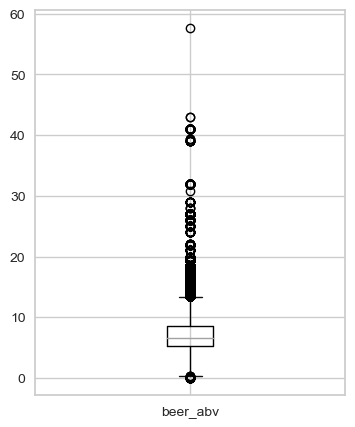

In [19]:
# Creating a boxplplot for visualizing alcohol by volume percentage
plt.figure(figsize=(4, 5))
plt.grid(linestyle='-')
beer_reviews.boxplot(column='beer_abv', vert=True)
plt.show()

### Observations

- Through this boxplot, we observe that the majority of the beers have an Alochol by Volume between the range of 1 to 13 (approximately).

- Furthermore, there are occurrences of beers with ABV values exceeding and falling below the typical range mentioned earlier.

#### 9. Beer's ABV against Overall Review Score

By comparing the beers with highest and lowest ABVs to their overall review scores, we could get a basic understanding of the influence of ABV on a beer's overall score.

We start by comparing these two attributes by beer name.

#### Beer ABV vs Overall Review Score by Beer Name

In [20]:
# Determining unique beers with the highest ABV
top5_beers = beer_reviews[['beer_name', 'beer_abv', 'review_overall']]
top5_beers_sorted = top5_beers.sort_values(by='beer_abv', ascending=False)
top5_beers_sorted.drop_duplicates('beer_name').head(10)

,beer_name,beer_abv,review_overall
index,,,
12919,Schorschbräu Schorschbock 57%,57.70,4.0
12939,Schorschbräu Schorschbock 43%,43.00,4.0
746343,Sink The Bismarck!,41.00,1.0
12942,Schorschbräu Schorschbock 40%,39.44,3.0
996154,Black Damnation VI - Messy,39.00,5.0
748356,Tactical Nuclear Penguin,32.00,4.5
12918,Schorschbräu Schorschbock 31%,30.86,3.5
1042334,Dave,29.00,5.0
746422,Ghost Deer,28.00,4.0


In [21]:
# Determining unique beers with the lowest ABV
low5_beers = beer_reviews[['beer_name', 'beer_abv', 'review_overall']]
low5_beers_sorted = low5_beers.sort_values(by='beer_abv', ascending=True)
low5_beers_sorted.drop_duplicates('beer_name').head(10)

,beer_name,beer_abv,review_overall
index,,,
274913,Liber,0.01,1.5
795876,Lindemans Chello,0.01,2.5
120140,Genesee NA,0.05,1.0
138416,Faxe Free,0.05,2.0
1346482,Bavaria Malt,0.05,2.0
693288,Xan Wellness,0.05,5.0
1304129,Budweiser NA,0.05,3.0
1475962,Arcobräu Non-Alcoholic Pale Weiss,0.05,4.0
1326088,Jupiler Force,0.08,1.0


### Observations

- Based on the above two tables, we observe that with the increase in a beer's ABV, there are more instances of higher overall scores.

- However, this is not a consistent correlation as there are some cases where beers with high ABV have low overall scores and beers with lower ABV have high overall scores.  



We can do a similar comparison by beer style.

#### Beer ABV vs Overall Review Score by Beer Style

In [22]:
# Determining beer styles with high abv
top5_styles = beer_reviews[['beer_style', 'beer_abv', 'review_overall']]
top5_styles_sorted = top5_styles.sort_values(by='beer_abv', ascending=False)
top5_styles_sorted.drop_duplicates('beer_style').head(10)

,beer_style,beer_abv,review_overall
index,,,
12919,Eisbock,57.7,4.0
746343,American Double / Imperial IPA,41.0,1.0
996154,American Double / Imperial Stout,39.0,5.0
1042334,English Barleywine,29.0,5.0
746422,Belgian Strong Pale Ale,28.0,4.0
293846,American Strong Ale,27.0,4.0
996004,Russian Imperial Stout,22.0,4.5
667527,American Malt Liquor,19.5,3.5
858886,American Barleywine,19.2,3.5


In [23]:
# Determining beer styles with low abv
low5_styles = beer_reviews[['beer_style', 'beer_abv', 'review_overall']]
low5_styles_sorted = low5_styles.sort_values(by='beer_abv', ascending=True)
low5_styles_sorted.drop_duplicates('beer_style').head(10)

,beer_style,beer_abv,review_overall
index,,,
274913,Low Alcohol Beer,0.01,1.5
795876,Lambic - Fruit,0.01,2.5
1475962,Hefeweizen,0.05,4.0
551836,Belgian Pale Ale,0.25,1.5
1067179,Kvass,0.50,3.5
746988,American IPA,0.50,4.0
1451992,Kristalweizen,0.50,1.5
1427325,Dunkelweizen,0.50,1.5
397393,Herbed / Spiced Beer,0.50,4.0


### Observations

- Building on the earlier observation, it is apparent that beer styles with higher Alcohol By Volume (ABV) values tend to exhibit a higher frequency of elevated overall ratings. Conversely, those with lower ABVs showcase fewer instances of higher ratings. However, this correlation is not consistently observed across all cases.

- This underscores that the overall score of a beer is influenced by multiple factors beyond just the ABV.

To delve deeper into the determinants of a beer's overall score, we will incorporate additional attributes such as aroma, appearance, palate, and taste.


#### 10 Correlation of Beer Attributes


The forthcoming analysis will explore the interrelationships between attributes of beer like aroma, palate, taste and appearance, shedding light on how they are correlated with each other.

### Analysis for the following question:
    
###  Impact of Alcohol Content on Beer Ratings?

Let us visualize this through a heatmap for better understanding.

### Correlation Heatmap

In [24]:
alcohol_content_corrdata = beer_reviews[['beer_abv','review_aroma','review_appearance', 'review_palate', 'review_taste', 'review_overall']]
correlation_matrix = alcohol_content_corrdata.corr()
print("The correlation matrix is:")
print(correlation_matrix)

The correlation matrix is:
                   beer_abv  review_aroma  review_appearance  review_palate  \
beer_abv           1.000000      0.332015           0.263621       0.286214   
review_aroma       0.332015      1.000000           0.558428       0.614311   
review_appearance  0.263621      0.558428           1.000000       0.563911   
review_palate      0.286214      0.614311           0.563911       1.000000   
review_taste       0.290356      0.714372           0.543918       0.731837   
review_overall     0.138397      0.612806           0.498255       0.698956   

                   review_taste  review_overall  
beer_abv               0.290356        0.138397  
review_aroma           0.714372        0.612806  
review_appearance      0.543918        0.498255  
review_palate          0.731837        0.698956  
review_taste           1.000000        0.787408  
review_overall         0.787408        1.000000  


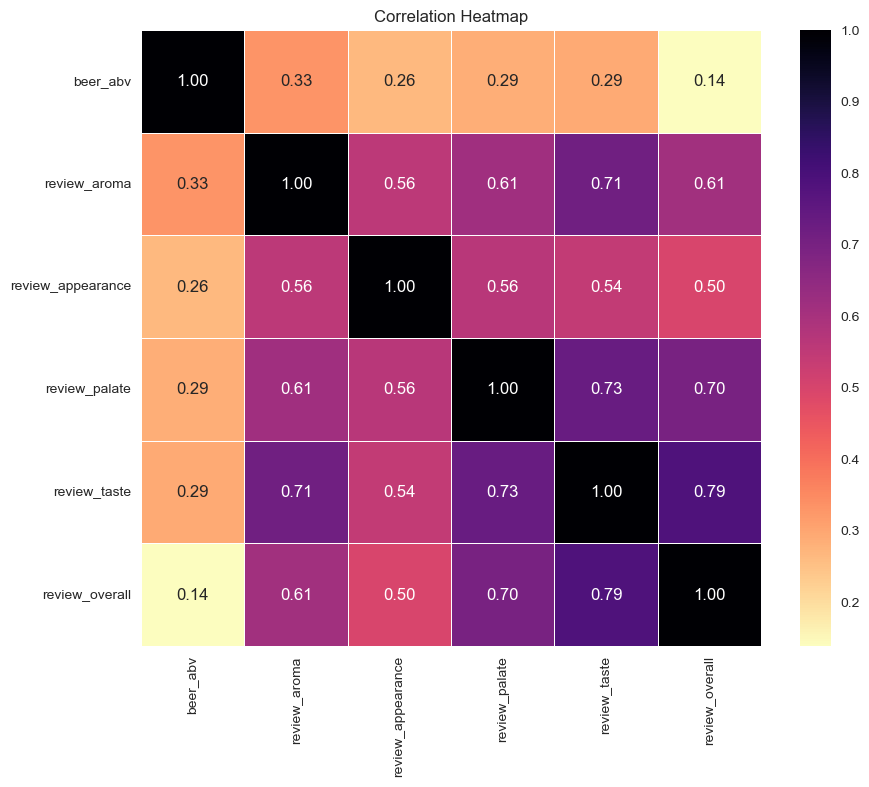

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma_r', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Observations

- The correlation heatmap reinforces the observations derived from our boxplot that the overall review score is majorly influenced by taste.

- The palate review score also has a significant effect on the overall review score

- Beer tends to defy the age old adage of 'You first eat with your eyes' to some extent given how the appearance has the least influence with the overal review ratings.

### Inferences
 
 - Beers with excellent taste often exhibit a well-structured palate, indicating that a harmonious combination of flavor and mouthfeel is appreciated by reviewers.
 
 - Beer experts are discerning in their evaluation of brews, and their judgment extends beyond the mere alcohol content. The discerning beer lover does not allow the strength of the beer, as indicated by its alcohol content, to solely dictate their perception of its quality. Instead, a genuine beer connoisseur employs a holistic approach, taking into account a symphony of factors such as aroma, taste, palate, and even the beer's visual presentation to form a comprehensive review and assign a rating.

### __Processing for Clustering__


With the completion of our EDA, we can begin processing our data to perform clustering operations.

This will include the following steps:

1. Label encoding the categorical variables
2. Scaling the numerical features
3. Creating a subset dataframe for dimensionality reduction

In [26]:
# Filtering main dataset
beer_reviews_styles = pd.DataFrame(beer_reviews['beer_style'].value_counts())

# Keeping only top 10 styles by number of reviews
beer_reviews_top_styles = beer_reviews_styles.head(10)

# Merging to filter out top 10 styles (inner join)
beer_reviews_top_styles_merged = pd.merge(beer_reviews_top_styles, beer_reviews,\
                                          left_index = True, right_on = beer_reviews['beer_style'])

Filtering the dataset, we retain only the top 10 beer styles based on the number of reviews.

The rationale behind this selection is that these beers likely represent the most popular choices.

The underlying assumption is that a higher number of reviews correlates with greater consumer preference.

Additionally, columns deemed irrelevant to our analysis are removed, streamlining the dataset for a more focused examination.


In [27]:
# Removing unnecessary columns from the dataframe
unnecessary_columns = ['review_time','review_profilename','beer_style_x']

beer_reviews_top_styles_merged = beer_reviews_top_styles_merged.drop(unnecessary_columns, axis = 1)

In [28]:
# Renaming the joining key to beer_style
beer_reviews_top_styles_merged.rename(columns = {'key_0':'beer_style'}, inplace = True)

In [29]:
# Checking number of rows in subset
len(beer_reviews_top_styles_merged)

542930

We've organized the vast world of beers into convenient groups to make the exploration and decision-making more straightforward. Let's delve into why these categorizations are beneficial:

#### Beer Quality Rating
We've classified beer reviews into four main categories based on their overall scores. This allows you to quickly assess the quality of a beer:

- **Poor**: Ratings below 3
- **Decent**: Ratings between 3 and 4
- **Good**: Ratings between 4 and 4.5
- **Best**: Ratings of 4.5 and above

By having these classifications, you can easily identify beers that fall within your preferred quality range. Whether you're looking for a casual sipper or a top-tier brew, the categorization streamlines your search.

#### Alcohol Strength
Understanding the alcohol content in beers is crucial, and we've simplified it into four levels:

- **Low**: Alcohol by volume (ABV) ranging from 0% to 5%
- **Mild**: ABV between 5% and 15%
- **Strong**: ABV between 15% and 30%
- **Extreme**: ABV of 30% and above

This categorization helps you choose beers based on your preferred alcohol strength. Whether you enjoy lighter options or crave a stronger kick, finding the right beer becomes much easier.

By categorizing beers in this way, we can effortlessly form groups based on quality and alcohol content.



In [30]:
# Creating bins based on overall score of beer
beer_reviews_bins = [-0.1, 3, 4, 4.5, 5]
beer_reviews_bins_labels = ['Poor', 'Decent', 'Good', 'Best']

# Creating bins based on alcohol by volume of beer
beer_abv_bins = [0, 5, 15, 30, 100]
beer_abv_bins_labels = ['Low', 'Mild', 'Strong', 'Extreme']

beer_reviews_top_styles_merged['review_flag'] = pd.cut(beer_reviews_top_styles_merged['review_overall'],\
                                                  beer_reviews_bins, labels=beer_reviews_bins_labels)

beer_reviews_top_styles_merged['alcohol_level'] = pd.cut(beer_reviews_top_styles_merged['beer_abv'],\
                                                  beer_abv_bins, labels=beer_abv_bins_labels)

In [31]:
beer_reviews_top_styles_merged.head()

,beer_style,brewery_id,brewery_name,review_overall,review_aroma,review_appearance,beer_style_y,review_palate,review_taste,beer_name,beer_abv,beer_beerid,review_flag,alcohol_level
index,,,,,,,,,,,,,,
585756,American IPA,18564,Upslope Brewing Company,4.5,4.5,4.0,American IPA,4.0,4.0,Upslope India Pale Ale,7.2,46414,Good,Mild
1089084,American IPA,812,Marin Brewing Company,3.5,3.0,4.5,American IPA,3.5,3.0,Three Flowers,6.5,71854,Decent,Mild
189841,American IPA,2743,Green Flash Brewing Co.,4.0,4.5,3.5,American IPA,4.0,4.0,Green Flash West Coast I.P.A.,7.3,22505,Decent,Mild
1433434,American IPA,27016,Somerville Brewing Company (Slumbrew),3.5,3.5,4.0,American IPA,4.0,3.5,Slumbrew Flagraiser IPA,7.5,74815,Decent,Mild
1058657,American IPA,200,Mendocino Brewing Company,2.0,3.0,3.0,American IPA,2.0,2.5,White Hawk Original IPA,7.0,4970,Poor,Mild


#### 1. Label encoding the categorical variables

Converting categorical variables to numerical format is crucial for effective clustering.

This process enables clustering algorithms to analyze and identify patterns within the data.

The next step involves systematically transforming each categorical variable, setting the stage for meaningful insights through clustering analyses.

In [32]:
# Data type of all variables
beer_reviews_top_styles_merged.dtypes

beer_style             object
brewery_id              int64
brewery_name           object
review_overall        float64
review_aroma          float64
review_appearance     float64
beer_style_y           object
review_palate         float64
review_taste          float64
beer_name              object
beer_abv              float64
beer_beerid             int64
review_flag          category
alcohol_level        category
dtype: object

In [33]:
# Keeping only numerical columns and columns to be encoded
beer_reviews_top_styles_merged_numerical = beer_reviews_top_styles_merged[['beer_style', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste','review_flag', 'alcohol_level']]

beer_reviews_top_styles_merged_numerical

,beer_style,review_aroma,review_appearance,review_palate,review_taste,review_flag,alcohol_level
index,,,,,,,
585756,American IPA,4.5,4.0,4.0,4.0,Good,Mild
1089084,American IPA,3.0,4.5,3.5,3.0,Decent,Mild
189841,American IPA,4.5,3.5,4.0,4.0,Decent,Mild
1433434,American IPA,3.5,4.0,4.0,3.5,Decent,Mild
1058657,American IPA,3.0,3.0,2.0,2.5,Poor,Mild
...,...,...,...,...,...,...,...
1346241,Belgian Strong Pale Ale,4.0,5.0,4.5,4.5,Best,Mild
1345030,Belgian Strong Pale Ale,4.5,4.0,4.0,4.5,Good,Mild
1563427,Belgian Strong Pale Ale,4.0,4.5,4.5,4.5,Good,Mild


In [34]:
# Get list of object type variables
s = (beer_reviews_top_styles_merged_numerical.dtypes == 'object')
object_cols = list(s[s].index)

print("Object type variables in the dataset:", object_cols)

Object type variables in the dataset: ['beer_style']


Label encoding is vital for clustering in machine learning, converting categorical data to a numerical format essential for algorithms.

It simplifies the process, retains order information, and ensures compatibility with clustering algorithms.

In [35]:
# Encoding using label encoder
LE = LabelEncoder()
for i in object_cols:
    beer_reviews_top_styles_merged_numerical[i]=beer_reviews_top_styles_merged_numerical[[i]].apply(LE.fit_transform)

print("Object features are now numerical")

Object features are now numerical


In [36]:
# Get list of categorical variables
s = (beer_reviews_top_styles_merged_numerical.dtypes == 'category') # uncomment and run once
cat_cols = list(s[s].index)

print("Categorical variables in the dataset:", cat_cols)

Categorical variables in the dataset: ['review_flag', 'alcohol_level']


In [37]:
# Encoding using label encoder
LE = LabelEncoder()
for i in cat_cols:
    beer_reviews_top_styles_merged_numerical[i]=beer_reviews_top_styles_merged_numerical[[i]].apply(LE.fit_transform)

print("All features are now numerical")

All features are now numerical


In [38]:
#displaying the dataframe
beer_reviews_top_styles_merged_numerical

,beer_style,review_aroma,review_appearance,review_palate,review_taste,review_flag,alcohol_level
index,,,,,,,
585756,3,4.5,4.0,4.0,4.0,2,2
1089084,3,3.0,4.5,3.5,3.0,1,2
189841,3,4.5,3.5,4.0,4.0,1,2
1433434,3,3.5,4.0,4.0,3.5,1,2
1058657,3,3.0,3.0,2.0,2.5,3,2
...,...,...,...,...,...,...,...
1346241,7,4.0,5.0,4.5,4.5,0,2
1345030,7,4.5,4.0,4.0,4.5,2,2
1563427,7,4.0,4.5,4.5,4.5,2,2


#### 2. Scaling the numerical features

We employ MinMaxScaler to standardize all attributes, ensuring they share a common scale for consistent and accurate comparisons.

MinMaxScaler is a technique that transforms numerical data to a specific range, typically between 0 and 1, facilitating fair comparisons among different features in data analysis

In [39]:
# Scaling using MinMaxScaler
scaler = MinMaxScaler()
beer_reviews_top_styles_merged_numerical_scaled = pd.DataFrame(scaler.fit_transform(beer_reviews_top_styles_merged_numerical),\
                                                   index = beer_reviews_top_styles_merged_numerical.index,\
                                                   columns = beer_reviews_top_styles_merged_numerical.columns)


print("All features are now scaled")


All features are now scaled


In [40]:
beer_reviews_top_styles_merged_numerical_scaled

,beer_style,review_aroma,review_appearance,review_palate,review_taste,review_flag,alcohol_level
index,,,,,,,
585756,0.333333,0.875,0.8,0.750,0.750,0.666667,0.666667
1089084,0.333333,0.500,0.9,0.625,0.500,0.333333,0.666667
189841,0.333333,0.875,0.7,0.750,0.750,0.333333,0.666667
1433434,0.333333,0.625,0.8,0.750,0.625,0.333333,0.666667
1058657,0.333333,0.500,0.6,0.250,0.375,1.000000,0.666667
...,...,...,...,...,...,...,...
1346241,0.777778,0.750,1.0,0.875,0.875,0.000000,0.666667
1345030,0.777778,0.875,0.8,0.750,0.875,0.666667,0.666667
1563427,0.777778,0.750,0.9,0.875,0.875,0.666667,0.666667


#### 3. Clustering

We use clustering as a technique to group similar data points together.

The elbow method assists us in determining the most suitable number of clusters for our data.

We look for the elbow point by running a clustering algorithm with varied cluster numbers and visualizing the results.

This point indicates the proper balance between simplicity and capturing the true nature of the data.

Elbow Method to determine the number of clusters to be formed:


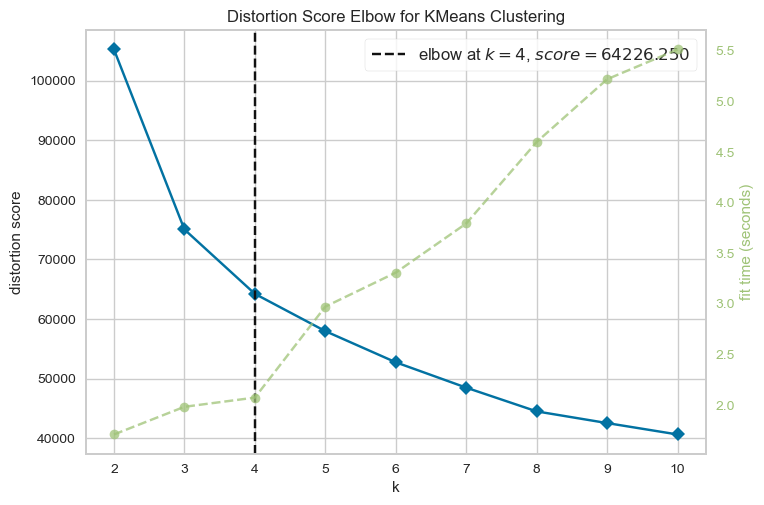

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
# Determining the optimal number of clusters
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(beer_reviews_top_styles_merged_numerical_scaled)
Elbow_M.show()

### Observations
- We find that the optimal number of clusters is 4 with a score of 64226.250.

- This indicates that when we organize our data into four clusters, the points within each group are well-organized.

- The lower score, 64226.250, suggests that these groups are neatly formed.

- In essence, it proposes that choosing four clusters is a fitting option for us to grasp the key patterns in our data without making things too complex or too straightforward.

We use K-Means clustering to create four clusters, leveraging the effectiveness of the `KMeans` algorithm.

The choice of four clusters is informed by the elbow method, revealing the optimal number for uncovering distinct patterns in our data.

The 'cluster' column enhances our exploration, providing a clear representation for meaningful insights derived from this approach.

In [42]:
# Using k-means clustering to create 4 clusters
kmeans_num = KMeans(n_clusters = 4, random_state = 42) # random state to keep consistent center selection (check documentation)

# Creating a column to show cluster
beer_reviews_top_styles_merged_numerical_scaled['cluster'] = kmeans_num.fit_predict(beer_reviews_top_styles_merged_numerical_scaled)
beer_reviews_top_styles_merged_numerical_scaled.head()

,beer_style,review_aroma,review_appearance,review_palate,review_taste,review_flag,alcohol_level,cluster
index,,,,,,,,
585756,0.333333,0.875,0.8,0.750,0.750,0.666667,0.666667,3
1089084,0.333333,0.500,0.9,0.625,0.500,0.333333,0.666667,0
189841,0.333333,0.875,0.7,0.750,0.750,0.333333,0.666667,0
1433434,0.333333,0.625,0.8,0.750,0.625,0.333333,0.666667,0
1058657,0.333333,0.500,0.6,0.250,0.375,1.000000,0.666667,2


In [43]:
# Adding the cluster column to the main dataframe
beer_reviews_top_styles_merged['cluster'] = beer_reviews_top_styles_merged_numerical_scaled['cluster']

# Final processed dataframe for profiling and analyzing clusters

Our data, now, is all set for detailed analysis. We've grouped the data by clusters and found average scores for overall experience, taste, aroma, and palate.

This helps us understand what customers prefer in each group.

These insights are valuable for making smart business decisions, allowing us to tailor our beer offerings to meet specific tastes and expectations.

In [44]:
# Final processed dataframe for profiling and analyzing clusters
beer_reviews_top_styles_merged

,beer_style,brewery_id,brewery_name,review_overall,review_aroma,review_appearance,beer_style_y,review_palate,review_taste,beer_name,beer_abv,beer_beerid,review_flag,alcohol_level,cluster
index,,,,,,,,,,,,,,,
585756,American IPA,18564,Upslope Brewing Company,4.5,4.5,4.0,American IPA,4.0,4.0,Upslope India Pale Ale,7.2,46414,Good,Mild,3
1089084,American IPA,812,Marin Brewing Company,3.5,3.0,4.5,American IPA,3.5,3.0,Three Flowers,6.5,71854,Decent,Mild,0
189841,American IPA,2743,Green Flash Brewing Co.,4.0,4.5,3.5,American IPA,4.0,4.0,Green Flash West Coast I.P.A.,7.3,22505,Decent,Mild,0
1433434,American IPA,27016,Somerville Brewing Company (Slumbrew),3.5,3.5,4.0,American IPA,4.0,3.5,Slumbrew Flagraiser IPA,7.5,74815,Decent,Mild,0
1058657,American IPA,200,Mendocino Brewing Company,2.0,3.0,3.0,American IPA,2.0,2.5,White Hawk Original IPA,7.0,4970,Poor,Mild,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346241,Belgian Strong Pale Ale,201,Brouwerij De Dolle Brouwers,5.0,4.0,5.0,Belgian Strong Pale Ale,4.5,4.5,De Dolle Arabier,8.0,633,Best,Mild,1
1345030,Belgian Strong Pale Ale,201,Brouwerij De Dolle Brouwers,4.5,4.5,4.0,Belgian Strong Pale Ale,4.0,4.5,De Dolle Bos Keun,10.0,634,Good,Mild,1
1563427,Belgian Strong Pale Ale,149,Brasserie Lefèbvre SA,4.5,4.0,4.5,Belgian Strong Pale Ale,4.5,4.5,Barbãr (Belgian Honey Ale),8.0,612,Good,Mild,1


In [45]:
# Determining average overall review for each cluster
beer_reviews_top_styles_merged.groupby('cluster')['review_overall'].mean()

cluster
0    3.984909
1    4.057656
2    2.655130
3    4.390962
Name: review_overall, dtype: float64

In [46]:
# Determining average taste score for each cluster
beer_reviews_top_styles_merged.groupby('cluster')['review_taste'].mean()

cluster
0    3.992103
1    4.108289
2    2.809361
3    4.316959
Name: review_taste, dtype: float64

In [47]:
# Determining average aroma score for each cluster
beer_reviews_top_styles_merged.groupby('cluster')['review_aroma'].mean()

cluster
0    3.939001
1    4.018157
2    3.111896
3    4.203585
Name: review_aroma, dtype: float64

In [48]:
# Determining average palate score for each cluster
beer_reviews_top_styles_merged.groupby('cluster')['review_palate'].mean()

cluster
0    3.916654
1    4.004568
2    2.979830
3    4.186596
Name: review_palate, dtype: float64

In [49]:
beer_reviews_top_styles_merged.groupby(['cluster','review_flag'])['review_overall'].count()

cluster  review_flag
0        Poor                0
         Decent         192435
         Good                0
         Best            26267
1        Poor              912
         Decent         110002
         Good            33664
         Best            10627
2        Poor            66852
         Decent            148
         Good              898
         Best                0
3        Poor             6825
         Decent              0
         Good            94300
         Best                0
Name: review_overall, dtype: int64

## Profiling Of The Clusters

### Cluster 1

* 3<sup>rd</sup> in overall, appearance, palate, taste scores
* 3<sup>rd</sup> in alcohol by volume %
* Mostly consists of beers that can be considered decent

### Cluster 0

* 2<sup>nd</sup> in overall, appearance, palate, taste scores
* 2<sup>nd</sup> in alcohol by volume %
* These are beers that were also well received by the consumers on average. However, they also consist a high proportion of decent beers, brining the average overall score down

### Cluster 2 (Lowest overall score)

* 4<sup>th</sup> in overall, appearance, palate, taste scores
* 4<sup>th</sup> in alcohol by volume %
* Mostly consists of beers that were considered poor

### Cluster 3 (Highest overall score)

* 1<sup>st</sup> in overall, appearance, palate, taste scores
* 1<sup>st</sup> in alcohol by volume %
* These are beers that were most well received by the consumers on average


Recognizing this distribution is essential for customizing business strategies and identifying varied customer preferences.

## __Data Analysis__:


### What features significantly contribute to a beer's success as a brand? Can we pinpoint factors leading to poor reception of a beer brand?

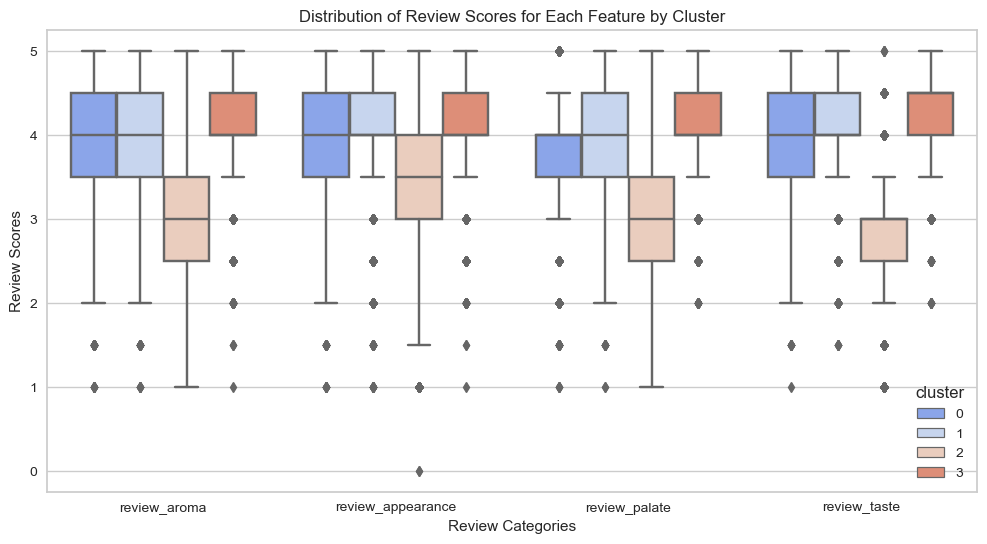

In [50]:
# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='variable', y='value', hue='cluster', data=pd.melt(beer_reviews_top_styles_merged, id_vars='cluster',
                                                                value_vars=['review_aroma', 'review_appearance', 'review_palate', 'review_taste']),
            palette='coolwarm')
plt.title('Distribution of Review Scores for Each Feature by Cluster')
plt.xlabel('Review Categories')
plt.ylabel('Review Scores')
plt.show()


### Observations 


- By analyzing the distribution of review scores for each feature by cluster, the average review score for cluster 2 is around 3, which is significantally lower than the rest.
- Safe to say that belonging to this cluster would mean that the beer or it's maker is likely to be poorly perceived. Lets's dub this the **'Infamous Cluster'**.
- While the rest of the clusters seem similar, we can notice that Cluster #3, does not have it's lower quantile go below 4 in any of the 4 metrics. We believe that it is the best cluster.
- From analyzing the 4 different review categories, we find that in those clusters, review_appearance and reveiw_taste have the high review scores compared to the other two. 

### Which beer styles consistently resonate with consumers?

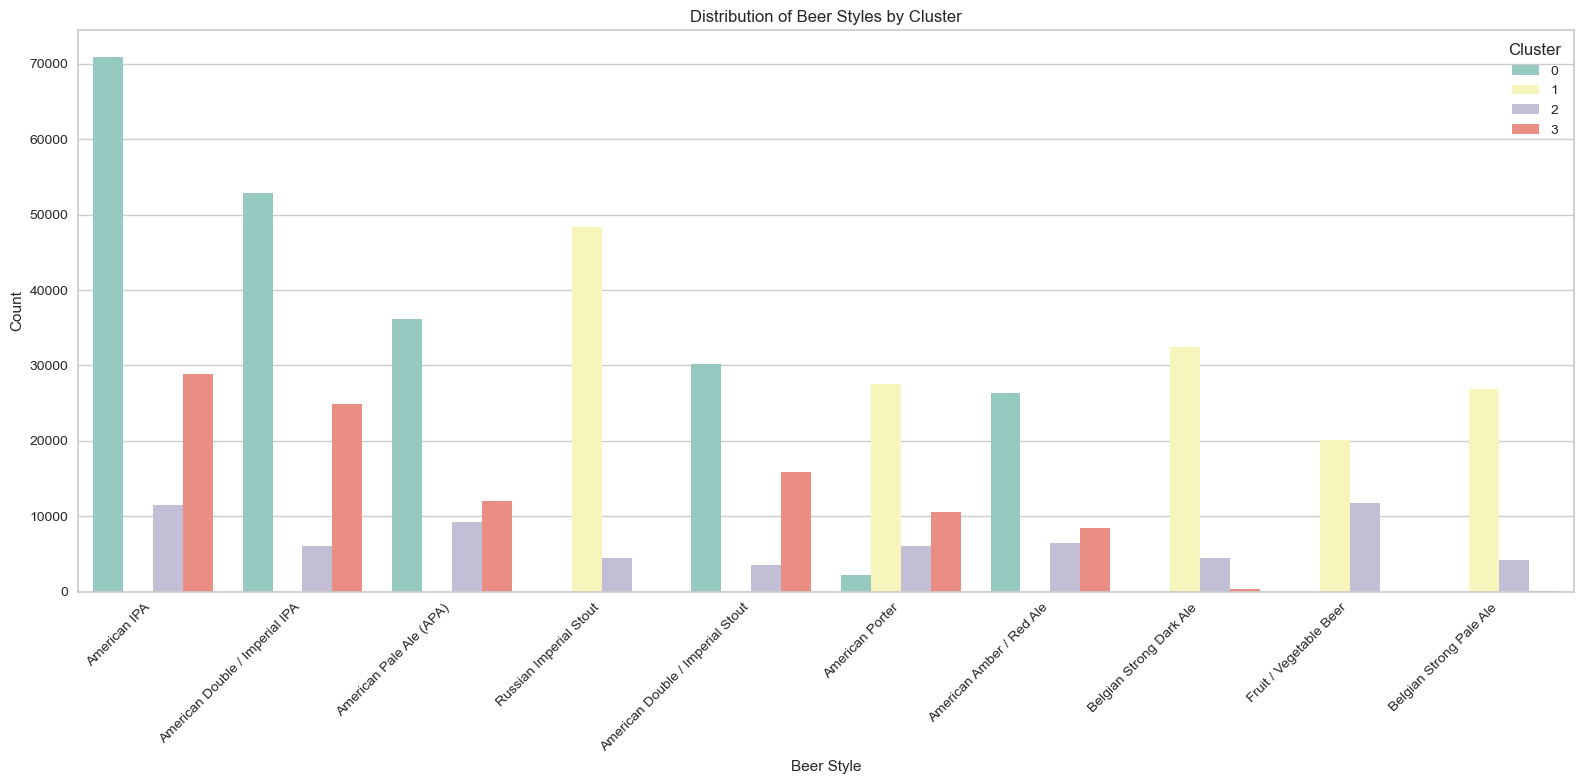

In [51]:
# Count plot for distribution of beer styles by cluster with custom color palette and improved spacing
custom_palette = sns.color_palette("Set3", n_colors=4)  # You can choose any other color palette

plt.figure(figsize=(16, 8))
sns.countplot(x='beer_style', hue='cluster', data=beer_reviews_top_styles_merged, palette=custom_palette)
plt.title('Distribution of Beer Styles by Cluster')
plt.xlabel('Beer Style')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels and set font size
plt.legend(title='Cluster', loc='upper right')
plt.tight_layout()  # Improve layout for better spacing
plt.show()


### Observations


- After closely examining the distribution of beer styles in different clusters, we found that cluster 0 primarily features the top three beer styles: American IPA, American Double/Imperial IPA, and American Pale Ale.
- It is evident that 'American IPA' and 'Fruit / Vegetable Beer' are more prevalent in the 'infamous' cluster. However, 'American IPA' is not as dominant in the 'infamous' cluster compared to its significant presence in the better clusters. 
- In contrast, 'Fruit / Vegetable Beer' is notably prominent in the 'infamous' cluster but less so in the other clusters.
- Furthermore, Cluster 2 consistently exhibits the lowest average number of reviews, always falling below 10k. This aligns with our observation that beers in Cluster 2 tend to receive less favorable reviews across various beer styles.



### Inferences
- American IPA's popularity could be attributed to widespread consumer preference for its distinctive bitter profile and the use of American hop varieties, offering citrus, pine, and floral notes. These flavor characteristics align with current market trends.
- Vegetable Juice beer's lower ranking might be explained by challenges in achieving a universally appealing taste with vegetable ingredients. 
- The diversity of vegetables used can result in varied and potentially polarizing flavors, impacting the beer's overall acceptance.
- Vegetable Juice beer, being an unconventional style, may face resistance due to consumers' unfamiliarity with or hesitancy to try beverages incorporating vegetable juices. 
- This experimental nature could lead to a less favorable reception in comparison to more established styles.




## __Conclusion__

- What we did: Through this analysis, we aimed to identify the extent to which each attribute of a beer affects its reception by consumers. We wanted to identify the beer styles that resonated consistently with them and how the characteristics varied across segments of beers, ultimately providing insights regarding their success and failure in the market.


- Why does it matter: Through data-driven insights, breweries gain a nuanced understanding of consumer preferences, allowing them to craft beers aligned with market desires. By tailoring offerings to suit popular beer styles and preferred alcohol content, breweries enhance their product relevance, 
meeting consumer demands more effectively. This alignment with consumer tastes fosters heightened satisfaction among beer enthusiasts, leading to increased brand loyalty. Moreover, pinpointing areas for quality enhancement based on analysis empowers breweries to refine their products, further augmenting consumer experience. Ultimately, this strategic utilization of insights not only elevates customer satisfaction but also fortifies brand loyalty by consistently delivering beers that resonate with the evolving preferences of their audience.



- What can we do differently ahead: The sheer number of breweries present, about 5600, and the beer styles, which were 104 in number, made it very difficult to work with. Incorporating them into our clustering would be more helpful in profiling beer styles and breweries through clustering. But in its current state, we need more computational resources to consider them all for clustering. More domain knowledge and additional brewery data could help narrow the number of categorical variables to a more computationally feasible number.


### Cheers to the search for the perfect pint!

## References:

- [1] Image: Insider - https://www.insider.com/quiz-to-find-out-what-type-of-beer-to-drink-2019-4
- [2] Dataset: Kaggle - https://www.kaggle.com/datasets/thedevastator/1-5-million-beer-reviews-from-beer-advocate/data
- [3] Beer Information- https://www.craftbeer.com/beer-styles